In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
path = "../dataset/train.csv"

In [58]:
df = pd.read_csv(path)

In [59]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [60]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.author = pd.Categorical(df.author).codes

In [61]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)

In [62]:
count_vectorizer = CountVectorizer(min_df=3, stop_words='english')
data = count_vectorizer.fit_transform(df_train['text'])

In [63]:
lda = LatentDirichletAllocation(n_components=10,random_state=0).fit(data)

In [64]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [65]:
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, 15)

Topics found via LDA:

Topic #0:
eyes door saw gave away like man open day heard madness long felt strange old

Topic #1:
mr left night way moon near came earth sky far went sun city appeared light

Topic #2:
time hour long nature right say object day left let did arm matter eyes man

Topic #3:
little time voice said heard thing like good face say man come head human away

Topic #4:
did old man things shall like love knew life saw world said great half believe

Topic #5:
man love years door did death thought heart return life long like strange passed alas

Topic #6:
life men little man great time thought thing saw sense length hope long true years

Topic #7:
far time day death great know life like went came long body space night sun

Topic #8:
said perdita raymond time did heart felt long eyes friend night end mind dead hand

Topic #9:
said man old time night like room shall water life think entered sea ye house


In [66]:
train_list = list(df_train['text'])
test_list = list(df_test['text'])
train_x = lda.transform(count_vectorizer.transform(train_list))
test_x = lda.transform(count_vectorizer.transform(test_list))

In [67]:
y_train = df_train['author'].astype(int)
y_test = df_test['author'].astype(int)

In [68]:
clf = LogisticRegression(random_state=0,max_iter=2000).fit(train_x, y_train)

In [69]:
y_pred = clf.predict(test_x)

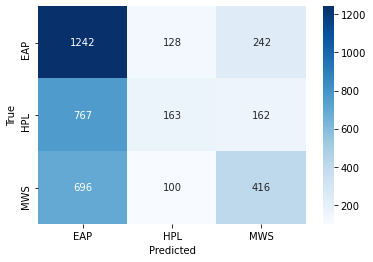

[0.57539958 0.21982468 0.40944882]


In [70]:
class_names = ['EAP','HPL','MWS']
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels())
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels())
plt.ylabel('True')
plt.xlabel('Predicted');
plt.show()

print(f1_score(y_test,y_pred,average=None))

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [72]:
clf.fit(train_x, y_train)
y_pred = clf.predict(test_x)

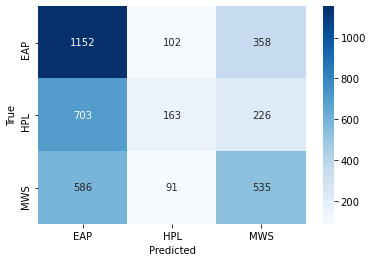

[0.5684678  0.22513812 0.45903046]


In [73]:
class_names = ['EAP','HPL','MWS']
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels())
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels())
plt.ylabel('True')
plt.xlabel('Predicted');
plt.show()

print(f1_score(y_test,y_pred,average=None))

'/Users/utkarshnath/Downloads'